In [1]:

import pandas as pd
from matplotlib import pyplot as plt

phd_stud   = pd.read_csv('all_studphd_inst.csv',index_col=0)

phd = phd_stud.groupby('Year')[[ 'grand_phd_total','black_phd_total','hispanic_phd_total','women_phd_total',\
                                 'total_phd_cs','black_phd_cs','hispanic_phd_cs','women_phd_cs', ]].mean()
phd['black_phd_cs']           = phd['black_phd_cs']/(phd['total_phd_cs'])
phd['hispanic_phd_cs']        = phd['hispanic_phd_cs']/phd['total_phd_cs']
phd['women_phd_cs']           = phd['women_phd_cs']/phd['total_phd_cs']
phd= phd.reset_index()

stud = pd.read_csv('all_student_inst.csv')

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total','women_total', \
                                  'total_cs','black_cs','hispanic_cs','women_cs', ]].mean()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud_set= stud_set.reset_index()
merged = pd.merge(phd, stud_set, on='Year')
merged


,Year,grand_phd_total,black_phd_total,hispanic_phd_total,women_phd_total,total_phd_cs,black_phd_cs,hispanic_phd_cs,women_phd_cs,grand_total,black_total,hispanic_total,women_total,total_cs,black_cs,hispanic_cs,women_cs,black_noncs,hispanic_noncs,women_noncs
0,2002,225.628788,8.848485,7.000000,99.068182,6.143939,0.018496,0.013564,0.204686,762.966484,63.215385,55.856593,440.227473,42.312709,0.098190,0.054440,0.266767,0.082726,0.073138,0.576645
1,2003,227.076271,9.050847,6.940678,99.974576,6.288136,0.026954,0.025606,0.223720,742.904576,60.511161,53.626674,428.263393,38.621053,0.094326,0.050014,0.272395,0.081325,0.072118,0.576105
2,2004,237.476190,9.340136,7.598639,105.585034,7.571429,0.016173,0.014376,0.188679,789.469899,66.416090,59.842834,455.173149,37.577328,0.104206,0.059322,0.219079,0.083995,0.075726,0.576278
3,2005,238.266667,10.385185,7.296296,104.970370,6.637037,0.016741,0.017857,0.216518,778.770314,65.343445,57.794150,449.270314,41.262469,0.102568,0.054653,0.246057,0.083774,0.074142,0.576581
4,2006,259.142857,10.394558,7.755102,116.809524,9.510204,0.011445,0.004292,0.216738,805.667197,68.114650,62.570064,465.822187,31.758013,0.104809,0.064061,0.200510,0.084414,0.077583,0.577933
5,2007,267.218543,11.390728,8.006623,123.350993,10.562914,0.018809,0.010658,0.206270,812.092525,68.614219,64.853110,467.477784,27.558327,0.103343,0.064662,0.179945,0.084363,0.079780,0.575424
6,2008,478.055901,22.788820,21.639752,238.627329,9.981366,0.026136,0.010579,0.216553,832.714998,71.328849,72.482810,475.487793,26.132856,0.098694,0.073944,0.177996,0.085540,0.086955,0.570795
7,2009,565.278689,24.622951,23.098361,273.901639,10.180328,0.019324,0.016103,0.223833,825.381994,70.116480,69.230926,472.561546,25.160128,0.097247,0.072076,0.173588,0.084833,0.083790,0.572326
8,2010,540.062500,20.562500,24.812500,253.843750,11.468750,0.021798,0.008174,0.201635,819.693698,69.889463,67.179236,470.689050,24.889595,0.099247,0.068324,0.171656,0.085142,0.081873,0.574016
9,2011,520.227778,30.605556,34.155556,264.183333,11.127778,0.038442,0.025462,0.223165,889.167171,81.383153,117.204320,509.214687,54.610245,0.081308,0.103834,0.193665,0.091436,0.131697,0.572469


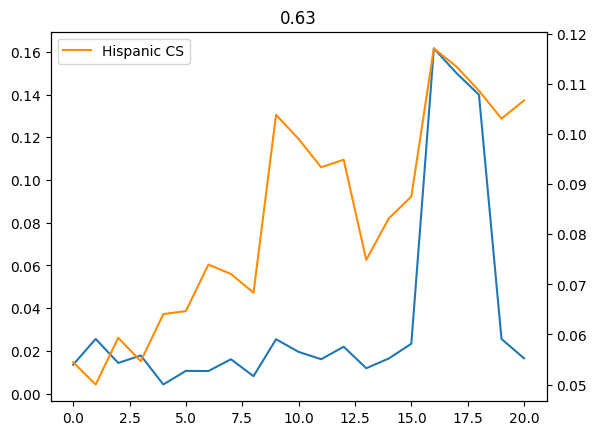

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['hispanic_phd_cs'],label="Hispanic CS-Phd")
plt.twinx()
plt.plot(merged.index, merged['hispanic_cs'],label="Hispanic CS",color='darkorange')
plt.title('Hispanic:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['hispanic_phd_cs'], merged['hispanic_cs'])[0], 2))
plt.legend()

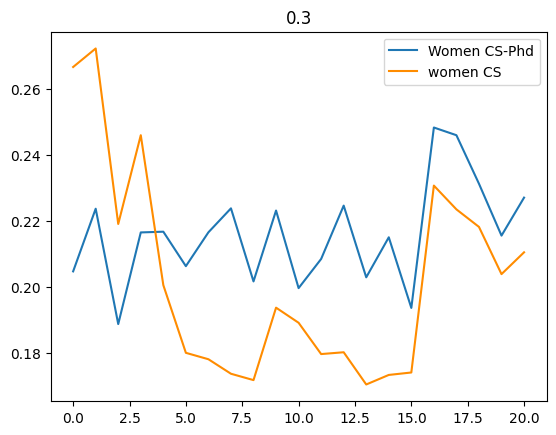

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['women_phd_cs'],label="Women CS-Phd")
# plt.twinx()
plt.plot(merged.index, merged['women_cs'],label="women CS",color='darkorange')
plt.title('Women:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['women_phd_cs'], merged['women_cs'])[0], 2))
plt.legend()

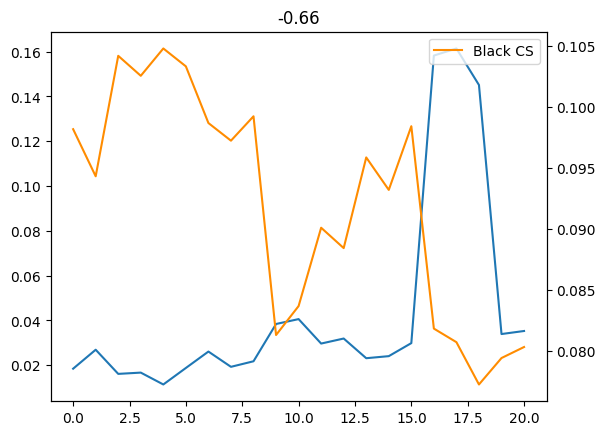

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['black_phd_cs'],label="Black CS-Phd")
plt.twinx()
plt.plot(merged.index, merged['black_cs'],label="Black CS",color='darkorange')
plt.title('Black:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr 
plt.title(round(pearsonr(merged['black_phd_cs'], merged['black_cs'])[0], 2))
plt.legend()